In [1]:
import healpy as hp
import numpy as np
from numpy import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nside=512
npix = hp.nside2npix(nside)

In [43]:
img = zeros(npix)
img = random.randn(npix)
img = hp.smoothing(img,fwhm=hp.nside2resol(64))

Sigma is 23.342668 arcmin (0.006790 rad) 
-> fwhm is 54.967783 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


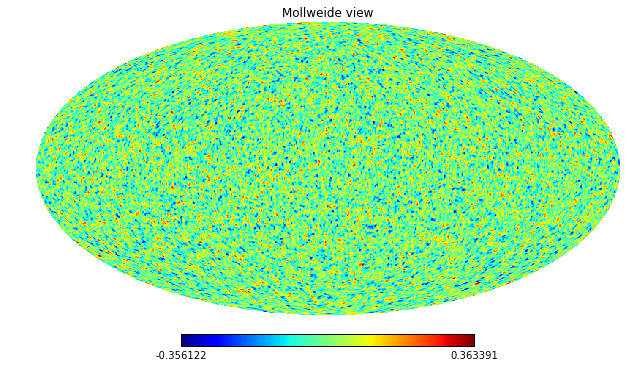

In [44]:
hp.mollview(img,rot=(0, 90, 0))

In [45]:
img_alm = hp.map2alm(img,lmax=300)

In [46]:
img_cl = hp.alm2cl(img_alm,lmax=300)

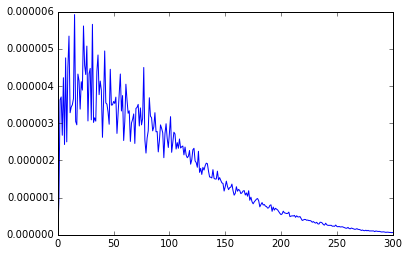

In [47]:
l = arange(len(img_cl))
plt.plot(l,img_cl)

In [48]:
dang = hp.nside2resol(128)*.8
dang_asec = dang*180./pi*3600
angmax = .14
angvals = linspace(-angmax,angmax,2*angmax/dang)
n = len(angvals)
#xgrid,ygrid = meshgrid(angvals,angvals)

In [49]:
x,y,z = hp.pix2vec(nside,arange(30000))

In [50]:
img_grid = zeros((n,n))
counts_grid = zeros((n,n))
for i in range(n):
    for j in range(n):
        in_x_cell = logical_and(x>-angmax+dang*i,x<-angmax+dang*(i+1))
        in_y_cell = logical_and(y>-angmax+dang*j,y<-angmax+dang*(j+1))
        in_cell = logical_and(in_x_cell,in_y_cell)
        img_grid[i,j] = sum(img[0:30000][in_cell])/sum(in_cell)
        counts_grid[i,j] = sum(in_cell)

<matplotlib.colorbar.Colorbar instance at 0x112a96950>

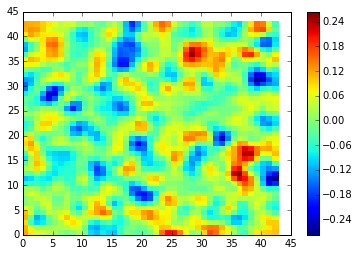

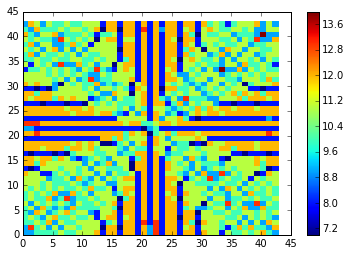

In [51]:
plt.pcolor(img_grid)
plt.colorbar()

plt.figure()
plt.pcolor(counts_grid)
plt.colorbar()

In [52]:
img_grid_ft = np.fft.fft2(img_grid)

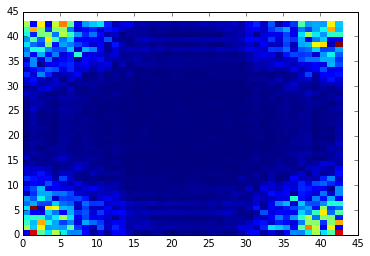

In [53]:
plt.pcolor(abs(img_grid_ft))

In [54]:
lvals =   np.fft.fftfreq(n)*2*pi/dang
lx,ly = meshgrid(lvals,lvals)
lmag = sqrt(lx**2+ly**2)

nbins = 5
lbinedges = linspace(10,300,nbins+1)
lbincenters = .5*(lbinedges[0:nbins]+lbinedges[1:nbins+1])
img_grid_ft_binned = zeros(nbins)
counts = zeros(nbins)
for bini in range(nbins):
    inbin = logical_and(lmag>lbinedges[bini],lmag<lbinedges[bini+1])
    img_grid_ft_binned[bini] = sum(abs(img_grid_ft[inbin])**2)/sum(inbin)
    counts[bini] = sum(inbin)

(5e-08, 1e-05)

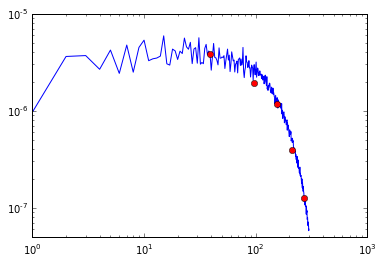

In [55]:
plt.loglog(l,img_cl)
plt.loglog(lbincenters,img_grid_ft_binned*(dang**2)/(n**2),'ro',linewidth=3)
plt.ylim([.5e-7,1.e-5])
#plt.xlim([50,1.e3])

In [1]:
n

NameError: name 'n' is not defined